In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
data = pd.read_csv('../Extracted Data/1stHalf_faces_info_csv.csv')


# Plots related to the number of faces by action

In [3]:
# Number of faces by every action in the match
df1 = data.copy()
df1['num'] = 1
df1 = df1[['action','gametime','position','num']]
count1 = df1.groupby(['action','gametime','position'], as_index=False, sort=False).sum()
count1.loc[count1['action']=='Corner']

,action,gametime,position,num
3,Corner,1 - 03:02,182775,160
19,Corner,1 - 11:07,667482,4
25,Corner,1 - 14:40,880053,1
28,Corner,1 - 16:11,971069,21
30,Corner,1 - 17:11,1031163,2
48,Corner,1 - 33:41,2021651,208
63,Corner,1 - 42:25,2545244,3


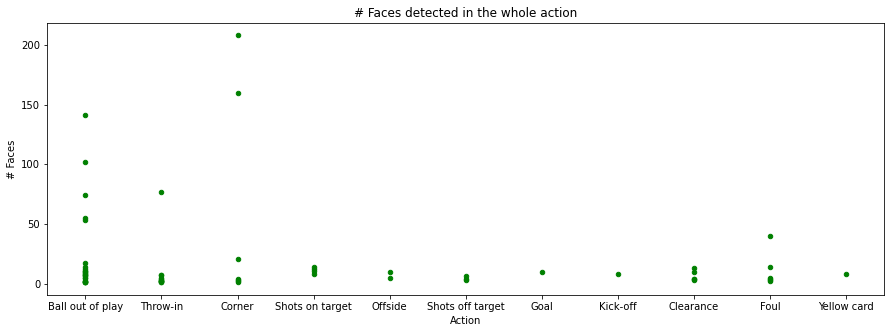

In [4]:
count1.plot(kind='scatter',x='action', y='num',color='green', figsize=(15,5), 
           title = '# Faces detected in the whole action', xlabel='Action', ylabel='# Faces')
plt.xlabel('Action')
plt.ylabel('# Faces')
plt.show()

In [5]:
# Number of faces by frame, of every action in the match
df2 = data.copy()
df2['num'] = 1
df2 = df2[['action','gametime','position','frame','num']]
count2 = df2.groupby(['action','gametime','position','frame'], as_index=False, sort=False).sum()
count2.loc[count2['action']=='Corner'].head()

,action,gametime,position,frame,num
15,Corner,1 - 03:02,182775,359,45
16,Corner,1 - 03:02,182775,360,42
17,Corner,1 - 03:02,182775,361,28
18,Corner,1 - 03:02,182775,362,45
132,Corner,1 - 11:07,667482,1332,2


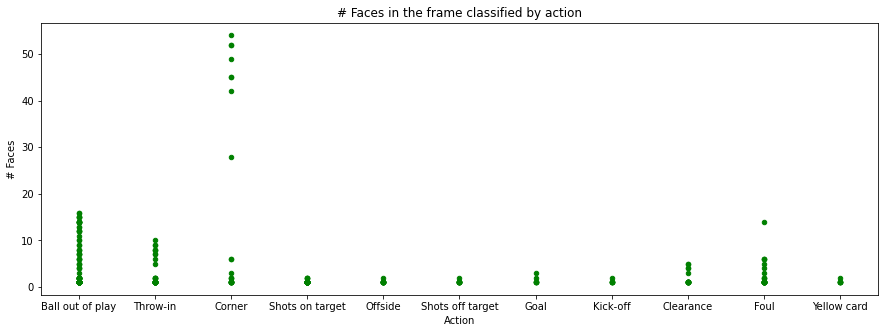

In [6]:
count2.plot(kind='scatter',x='action', y='num',color='green', figsize=(15,5), 
           title = '# Faces in the frame classified by action', xlabel='Action', ylabel='# Faces')
plt.xlabel('Action')
plt.ylabel('# Faces')
plt.show()

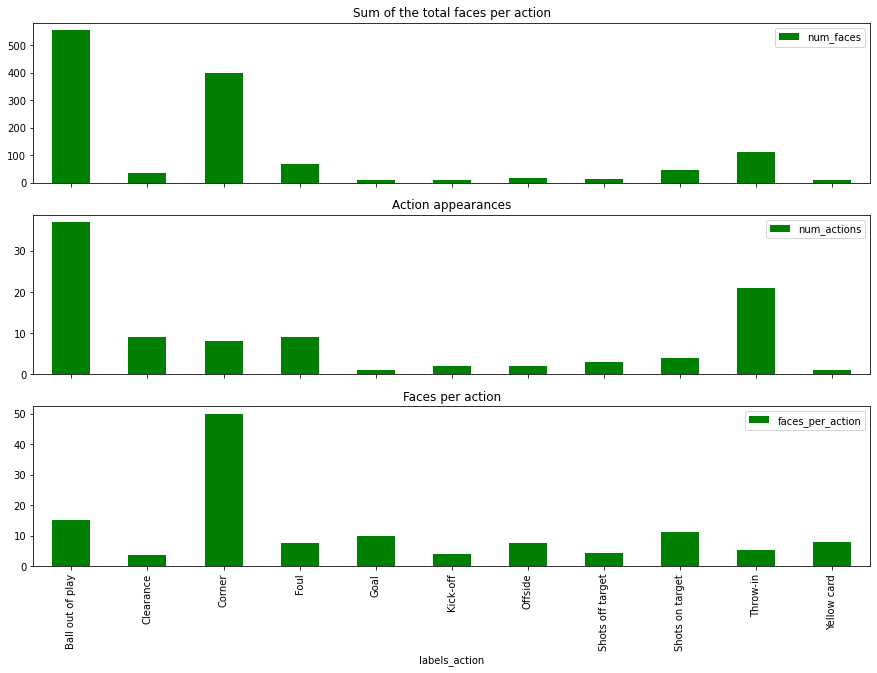

In [15]:
# Reation between total faces by action and times that the action apears
df3 = data.copy()
df3['num'] = 1
df3 = df3[['action','num']]
count3 = df3.groupby(['action'], as_index=False).sum().rename(columns={'action':'video_action','num':'num_faces'})

import json
json_path = '../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v2.json'
with open(json_path) as f:
    ann = json.load(f)

an_df = pd.DataFrame(ann['annotations'])
an_df = an_df.loc[an_df['gameTime'].str[:1]=='1'] # para solo agarrar acciones de la 1ra parte 
                                                  # --> cuando solo usamos caras de la 1ra parte
an_df = an_df[['label']]
an_df['num']=1
count4 = an_df.groupby(['label'], as_index=False).sum().rename(columns={'label':'labels_action','num':'num_actions'})

a = pd.merge(count3,count4,left_on='video_action',right_on='labels_action',how='inner')
a['faces_per_action'] = a['num_faces']/a['num_actions']


fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)

a.plot(kind='bar',x='video_action',y='num_faces',color='green', figsize=(15,15),
       title='Sum of the total faces per action', ax=axes[0])

a.plot(kind='bar',x='labels_action',y='num_actions',color='green', figsize=(15,15),
       title='Action appearances', ax=axes[1])

a.plot(kind='bar',x='labels_action',y='faces_per_action',color='green', figsize=(15,10),
       title='Faces per action',ax=axes[2])

plt.show()



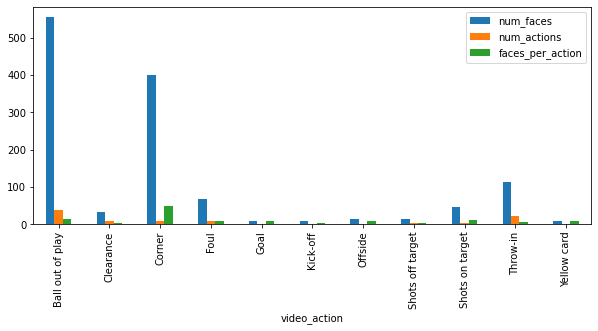

In [9]:
a.plot(kind='bar', x='video_action',figsize=(10,4))
plt.show()

# Plots and information related to WHEN the faces are detected

In [10]:
def get_frame(position):
    return (position//1000)*2


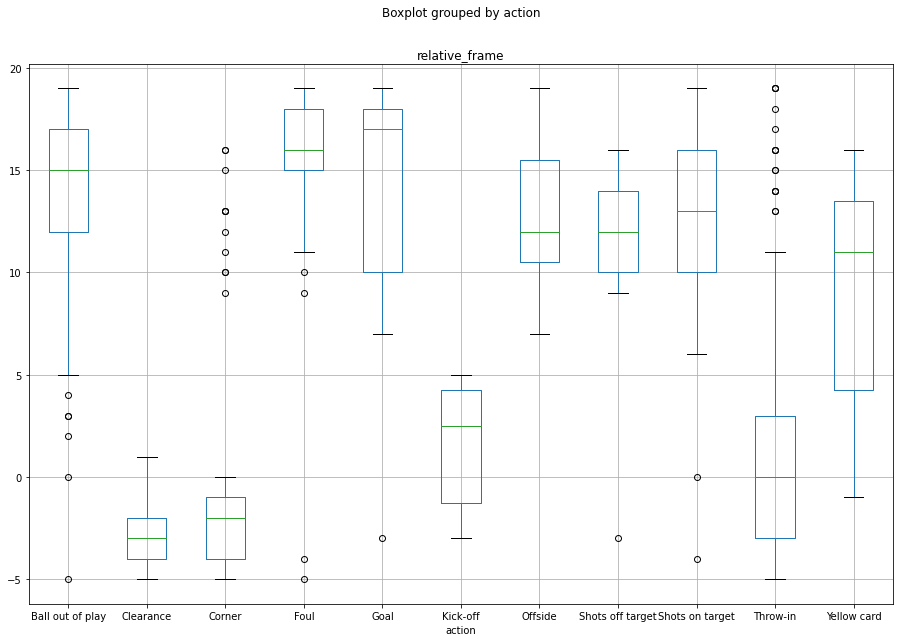

In [11]:
dfw = data[['action','gametime','position','frame']].copy()

dfw['position_frame'] = get_frame(dfw['position'])
dfw['relative_frame'] = dfw['frame'] - dfw['position_frame']
dfw.boxplot(column='relative_frame',by='action', figsize=(15,10))
plt.show()

In [12]:
a = dfw.loc[dfw['position'] == 971069]
a

,action,gametime,position,frame,position_frame,relative_frame
675,Corner,1 - 16:11,971069,1937,1942,-5
676,Corner,1 - 16:11,971069,1937,1942,-5
677,Corner,1 - 16:11,971069,1937,1942,-5
678,Corner,1 - 16:11,971069,1937,1942,-5
679,Corner,1 - 16:11,971069,1937,1942,-5
680,Corner,1 - 16:11,971069,1937,1942,-5
681,Corner,1 - 16:11,971069,1938,1942,-4
682,Corner,1 - 16:11,971069,1938,1942,-4
683,Corner,1 - 16:11,971069,1938,1942,-4
684,Corner,1 - 16:11,971069,1938,1942,-4
